In [2]:
import numpy as np, matplotlib.pyplot as plt

In [3]:
dirs = [[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1],[-1,-1]]
Nx = 20
Ny = 21

foodMatrix = np.zeros((Nx,Ny))
foodMatrix[3,10] = 100

nestMatrix = np.zeros((Nx,Ny))
nestMatrix[16,10] = 1
homePh = np.zeros((Nx,Ny))
forgPh = np.zeros((Nx,Ny))


obstMatrix = np.zeros((Nx,Ny))

In [163]:
def old_probFunc(x):
    return (0.3+x)**(2)
def probFunc(x):
    return 1/( 1/(x**3+0.01) + np.exp(-20*np.sqrt(np.sqrt(x)) - 23))
initialSmell = 1.
smellDecay = 0.995
class Ant:
    def __init__(self, in_pos, in_dr):

        self.pos = np.array(in_pos)
        self.dr = in_dr
        self.food = False
        self.smell = initialSmell
    def update(self):
        if self.food == False:
            #searching for food
            forgPh[tuple(self.pos)] += self.smell
            self.smell = smellDecay*self.smell
            targets = self.pos+np.array([dirs[(self.dr-1)%8], dirs[self.dr], dirs[(self.dr + 1)%8]])
            for i in range(3):
                targets[i,0] = targets[i,0]%Nx
                targets[i,1] = targets[i,1]%Ny
                #check for food
                if foodMatrix[tuple(targets[i])] > 0:
                    foodMatrix[tuple(targets[i])] -= 1
                    self.food = True
                    self.smell = (self.smell + initialSmell)*1.5
                    self.pos = targets[i]
                    self.dr = ((self.dr + (i - 1)) + 4)%8
                    return 0

            

            prob = np.array([probFunc(homePh[tuple(index)]) for index in targets])
            #walls
            for idx,tar in enumerate(targets):
                if obstMatrix[tuple(tar)]==1:
                    prob[idx]=0
            if prob.sum() == 0:
                if np.random.randint(5000)==10:
                    print("Help me step-ant, I'm stuck")
                self.dr = ((self.dr + (i - 1)) + 4)%8
                return 0
            prob = prob/prob.sum()
            self.dr = np.random.choice([(self.dr-1)%8, self.dr, (self.dr + 1)%8], p=prob)
            self.pos += dirs[self.dr]
            self.pos[0] = self.pos[0]%Nx
            self.pos[1] = self.pos[1]%Ny
            return 0
        else:
            #carrying food
            homePh[tuple(self.pos)] += self.smell
            self.smell = smellDecay*self.smell
            targets = self.pos+np.array([dirs[(self.dr-1)%8], dirs[self.dr], dirs[(self.dr + 1)%8]])
            for i in range(3):
                targets[i,0] = targets[i,0]%Nx
                targets[i,1] = targets[i,1]%Ny
                #check for nest
                if nestMatrix[tuple(targets[i])] > 0:
                    self.food = False
                    self.smell = (self.smell + initialSmell)*1.5
                    self.pos = targets[i]
                    self.dr = ((self.dr + (i - 1)) + 4)%8
                    if np.random.randint(1000)==10:
                        print("Returned food. For the colony.")
                    return 1

            

            prob = np.array([probFunc(forgPh[tuple(index)]) for index in targets])
            #walls
            for idx,tar in enumerate(targets):
                if obstMatrix[tuple(tar)]==1:
                    prob[idx]=0
            if prob.sum() == 0:
                if np.random.randint(5000)==10:
                    print("Help me step-ant, I'm stuck")
                self.dr = ((self.dr + (i - 1)) + 4)%8
                return 0
            prob = prob/prob.sum()
            self.dr = np.random.choice([(self.dr-1)%8, self.dr, (self.dr + 1)%8], p=prob)
            self.pos += dirs[self.dr]
            self.pos[0] = self.pos[0]%Nx
            self.pos[1] = self.pos[1]%Ny
            return 0

In [164]:
def plotter():
    res = np.zeros((Ny,Nx,3))
    col = 1.5
    res[:,:,0] = np.where(homePh.T/col > 1, 1, homePh.T/col)
    res[:,:,2] = np.where(forgPh.T/col > 1, 1, forgPh.T/col)
    res[nestMatrix.T==1] = np.array([1.,1.,1.])
    res[foodMatrix.T>1] = np.array([0.,1.,0.])
    res[obstMatrix.T==1] = np.array([139/255,69/255,19/255])
    return plt.imshow(res)

In [288]:
def DirichletMap():
    global Nx,Ny
    Nx = 85
    Ny = 65

    global initialSmell
    global smellDecay
    initialSmell = 1.
    smellDecay = 0.98

    global foodMatrix
    global nestMatrix
    global obstMatrix

        
        
    foodMatrix = np.zeros((Nx,Ny))
    nestMatrix = np.zeros((Nx,Ny))
    obstMatrix = np.zeros((Nx,Ny))

    #obst
    for j in range(4):
        obstMatrix[j-2] = np.tile(1,Ny)
    for j in range(4):
        obstMatrix[:,j-2] = np.tile(1,Nx)


    #food
    foodMatrix = np.zeros((Nx,Ny))
    
    start_row, start_col = 2, 2
    end_row, end_col = (Nx*2)//7, Ny
    foodMatrix[start_row:end_row, start_col:end_col] = 100

    #nest
    nestMatrix = np.zeros((Nx,Ny))
    nestPos = np.array([(Nx*5)//7,Ny//2])
    nestMatrix[tuple(nestPos)] = 1
    for dr in dirs:
        nestMatrix[tuple(nestPos+dr)] = 1
    return nestPos


def BlockMap():
    global Nx,Ny
    Nx = 85
    Ny = 65

    global initialSmell
    global smellDecay
    initialSmell = 1.
    smellDecay = 0.98

    global foodMatrix
    global nestMatrix
    global obstMatrix

        
        
    foodMatrix = np.zeros((Nx,Ny))
    nestMatrix = np.zeros((Nx,Ny))
    obstMatrix = np.zeros((Nx,Ny))

    #obst
    start_row, start_col = (Nx*3)//7, (Ny*1)//3
    end_row, end_col = (Nx*4)//7, (Ny*2)//3
    obstMatrix[start_row:end_row, start_col:end_col] = 1
    for j in range(4):
        obstMatrix[j-2] = np.tile(1,Ny)
    for j in range(4):
        obstMatrix[:,j-2] = np.tile(1,Nx)


    #food
    foodMatrix = np.zeros((Nx,Ny))
    
    start_row, start_col = 2, 2
    end_row, end_col = (Nx*2)//7, Ny
    foodMatrix[start_row:end_row, start_col:end_col] = 100

    #nest
    nestMatrix = np.zeros((Nx,Ny))
    nestPos = np.array([(Nx*5)//7,Ny//2])
    nestMatrix[tuple(nestPos)] = 1
    for dr in dirs:
        nestMatrix[tuple(nestPos+dr)] = 1
    return nestPos
    
def ZigZagMap():
    global Nx,Ny
    Nx = 85
    Ny = 65

    global initialSmell
    global smellDecay
    initialSmell = 2.
    smellDecay = 0.993

    global foodMatrix
    global nestMatrix
    global obstMatrix

        
        
    foodMatrix = np.zeros((Nx,Ny))
    nestMatrix = np.zeros((Nx,Ny))
    obstMatrix = np.zeros((Nx,Ny))

    #obst
    #walls around
    for j in range(4):
        obstMatrix[j-2] = np.tile(1,Ny)
    for j in range(4):
        obstMatrix[:,j-2] = np.tile(1,Nx)

    #blocks:
    start_row, start_col = 30, 0
    end_row, end_col = 32, (Ny*3)//4
    obstMatrix[start_row:end_row, start_col:end_col] = 1
    
    start_row, start_col = 40, (Ny*1)//4
    end_row, end_col = 42, -1
    obstMatrix[start_row:end_row, start_col:end_col] = 1

    
    start_row, start_col = 50, 0
    end_row, end_col = 52, (Ny*3)//4
    obstMatrix[start_row:end_row, start_col:end_col] = 1


    #food
    foodMatrix = np.zeros((Nx,Ny))
    
    start_row, start_col = 2, 2
    end_row, end_col = (Nx*2)//7, Ny
    foodMatrix[start_row:end_row, start_col:end_col] = 100

    #nest
    nestMatrix = np.zeros((Nx,Ny))
    nestPos = np.array([(Nx*5)//7,Ny//2])
    nestMatrix[tuple(nestPos)] = 1
    for dr in dirs:
        nestMatrix[tuple(nestPos+dr)] = 1
    return nestPos

def LabirynthMap():
    global Nx,Ny
    Nx = 61
    Ny = 61

    global initialSmell
    global smellDecay
    initialSmell = 2.
    smellDecay = 0.993

    global foodMatrix
    global nestMatrix
    global obstMatrix

        
        
    foodMatrix = np.zeros((Nx,Ny))
    nestMatrix = np.zeros((Nx,Ny))
    obstMatrix = np.zeros((Nx,Ny))

    #obst
    #walls around
    for j in range(4):
        obstMatrix[j-2] = np.tile(1,Ny)
    for j in range(4):
        obstMatrix[:,j-2] = np.tile(1,Nx)

    ######

    #squares:
    boxR = 17
    idx = 0
    entryList = np.array([[0,-1],[1,0],[-1,0],[0,1]])
    while boxR<=47:
        obstMatrix[(Nx-boxR)//2,(Ny-boxR)//2:(Ny+boxR)//2] = np.tile(1,boxR)
        obstMatrix[(Nx+boxR)//2-1,(Ny-boxR)//2:(Ny+boxR)//2] = np.tile(1,boxR)
        obstMatrix[(Ny-boxR)//2:(Nx+boxR)//2,(Ny-boxR)//2] = np.tile(1,boxR)
        obstMatrix[(Ny-boxR)//2:(Nx+boxR)//2,(Ny+boxR)//2-1] = np.tile(1,boxR)

        entryPos = np.array([Nx//2,Ny//2]) + entryList[idx]*(boxR//2)
        obstMatrix[entryPos[0]-1:entryPos[0]+2,entryPos[1]-1:entryPos[1]+2] = 0
        boxR += 10
        idx+=1

    #gate
    obstMatrix[Nx//2-5:Nx//2-3,-7:-2] = np.tile(1,5)
    obstMatrix[Nx//2+4:Nx//2+6,-7:-2] = np.tile(1,5)


    #food
    foodMatrix = np.zeros((Nx,Ny))
    start_row, start_col = Nx//2-3, Ny//2-3
    end_row, end_col = Nx//2+4, Ny//2+4
    foodMatrix[start_row:end_row, start_col:end_col] = 1000

    #nest
    nestMatrix = np.zeros((Nx,Ny))
    nestPos = np.array([Nx//2,-5])
    nestMatrix[tuple(nestPos)] = 1
    return nestPos

In [289]:
test = [1,2,3]
test[0:2]
np.tile(1,3)

array([1, 1, 1])

In [297]:
dirs = [[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1],[-1,-1]]
Nx = 85
Ny = 65

evRate = 0.993
dfRate = 0.99
foodMatrix = np.zeros((Nx,Ny))
nestMatrix = np.zeros((Nx,Ny))
homePh = np.zeros((Nx,Ny))
forgPh = np.zeros((Nx,Ny))
screenI = []
obstMatrix = np.zeros((Nx,Ny))
def RunSimulation(nAnts,sim_length):
    global foodMatrix
    global nestMatrix
    global obstMatrix
    global homePh
    global forgPh
    
    #set a targert map and get the spawn point:
    nestPos = LabirynthMap()
    #reset pheromones
    homePh = np.zeros((Nx,Ny))
    forgPh = np.zeros((Nx,Ny))
    
    sim_i = 0
    antList = []
    foodCount = 0
    foodCounts = []
    while sim_i < sim_length:
        if sim_i<nAnts:
            antList.append(Ant(nestPos,np.random.randint(8)))
        for antoni in antList:
            foodCount += antoni.update()
        foodCounts.append(foodCount)
        #diffuse
        if True:
            homePh = dfRate*homePh + 1/4*(1-dfRate)*(np.roll(homePh, 1, axis=0) + np.roll(homePh, -1, axis=0) + np.roll(homePh, 1, axis=1) + np.roll(homePh, -1, axis=1))
            forgPh = dfRate*forgPh + 1/4*(1-dfRate)*(np.roll(forgPh, 1, axis=0) + np.roll(forgPh, -1, axis=0) + np.roll(forgPh, 1, axis=1) + np.roll(forgPh, -1, axis=1))
        #evaporate
        homePh = evRate*homePh
        forgPh = evRate*forgPh
        if sim_i in screenI:  
            print(f"i = {sim_i}")
            plotter()
            plt.show()
        sim_i+=1
    return foodCounts

i = 50


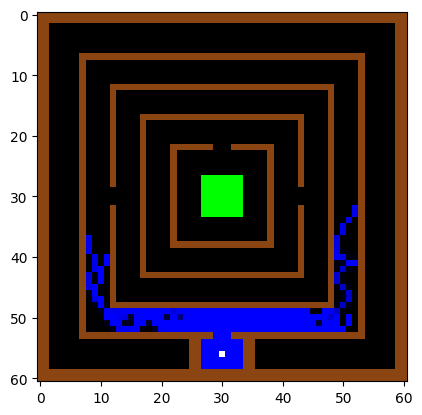

i = 200


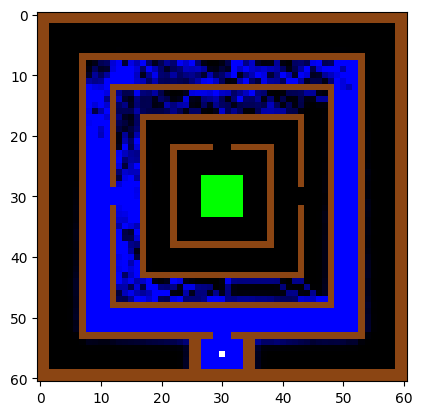

Help me step-ant, I'm stuck
i = 400


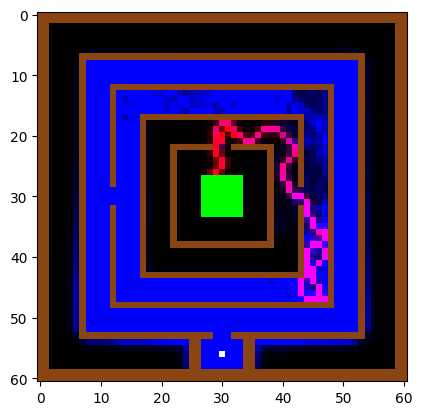

Help me step-ant, I'm stuck
i = 800


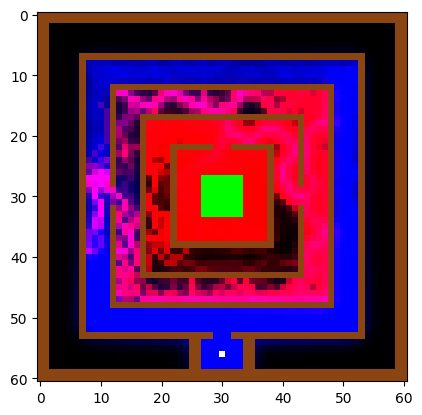

Help me step-ant, I'm stuck
i = 1200


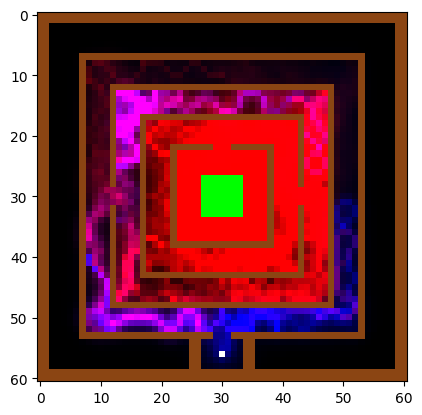

i = 2000


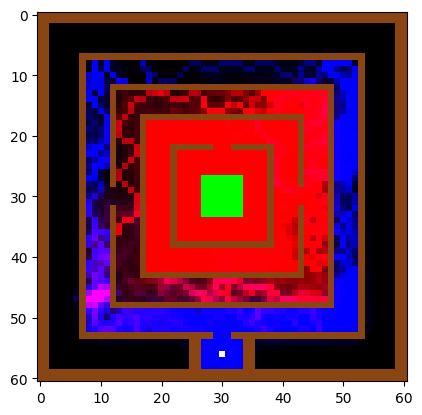

Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
i = 2500


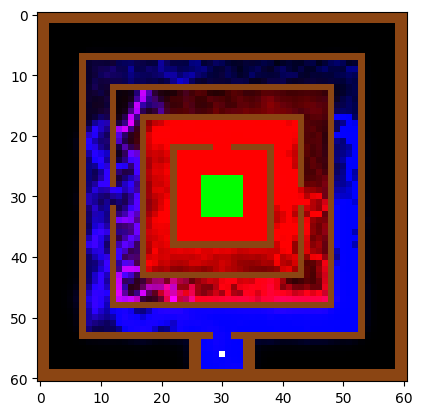

i = 3000


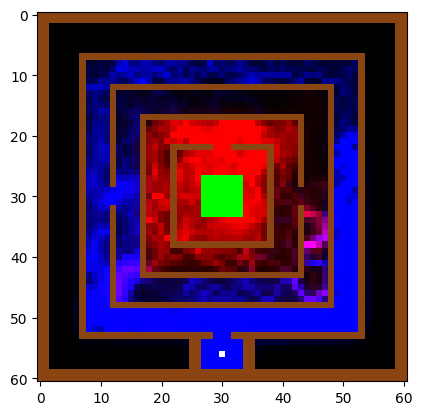

Help me step-ant, I'm stuck
i = 4000


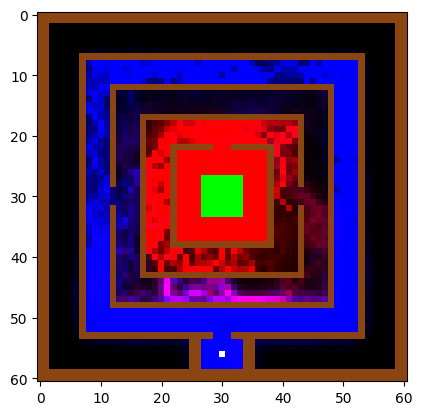

Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
i = 6000


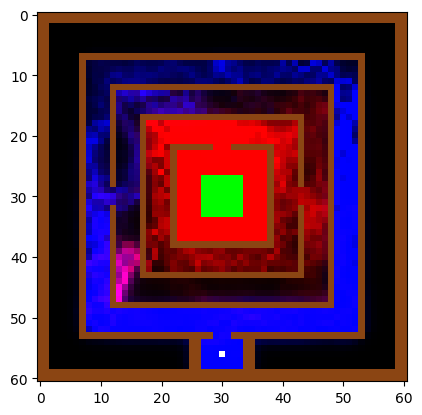

Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
Help me step-ant, I'm stuck
i = 8000


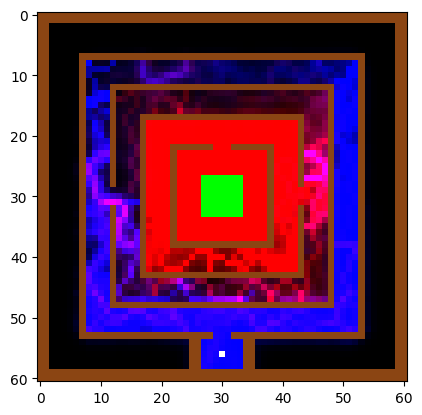

Help me step-ant, I'm stuck


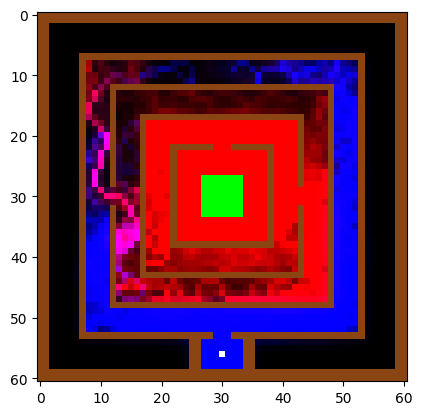

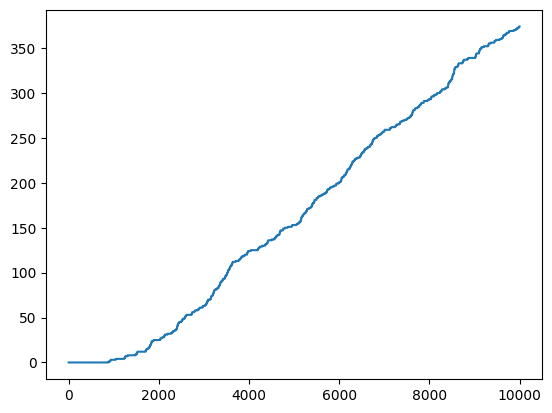

In [299]:
screenI = [50,200,400,800,1200,2000,2500,3000,4000,6000,8000]
np.random.seed(seed=69)
foodCounts = RunSimulation(200,10000)
plotter()
plt.show()
plt.plot(foodCounts)

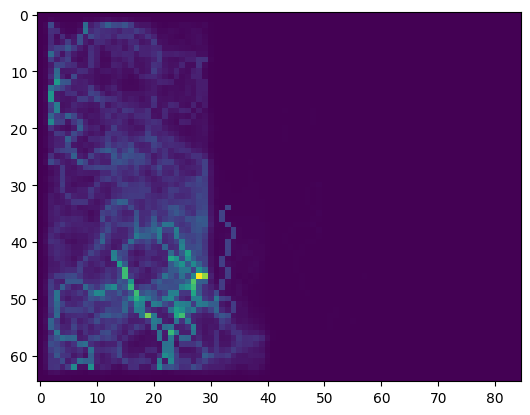

In [170]:
plt.imshow(homePh.T)

In [140]:
print(homePh[20])

[4.77804945e-03 2.44685398e-03 4.58291371e-03 8.92129244e-03
 1.00887346e-02 1.27435629e-02 1.59179287e-02 3.57487517e-02
 2.02409297e-02 8.07644848e-03 8.49098515e-03 1.17283617e-02
 1.78251797e-02 4.72375734e-02 5.20281756e-02 5.03634915e-02
 3.60544029e-02 4.18892929e-02 3.83457416e-02 1.29740381e-01
 4.43592945e-01 1.58417681e-01 1.12040948e-01 1.35335909e-01
 2.21968118e-01 2.36691111e-01 2.47902100e-01 2.95545677e-01
 3.44654043e-01 3.26091310e-01 3.76779594e-01 5.28006956e-01
 1.06795399e+00 1.28869087e+00 1.22376567e+00 1.33954999e+00
 2.18016991e+00 2.04653075e+00 1.28959529e+00 5.82436438e-01
 5.30927092e-01 3.33981508e-01 6.29117543e-01 3.13267626e-01
 2.18262899e-01 3.66307007e-01 5.18369379e-01 1.05910087e+00
 4.69160484e-01 4.78478080e-01 8.36708694e-01 3.91082654e-01
 5.10306604e-01 1.34126526e+00 6.46300563e+00 1.63098680e+01
 6.41371009e+01 1.23927428e+01 3.00790851e+00 7.92677745e-01
 4.94288136e-01 1.90811027e+00 1.77705161e+00 1.38847682e-01
 2.06028536e-02]


In [69]:
ttt=np.array([90,17,3])
probFunc(ttt)

array([5.79194815e+11, 3.75583529e+07, 6.32136305e+03])